In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']
df = pd.read_csv('C:/Users/Harsh Yadav/Desktop/datamerged.csv',encoding="ISO-8859-1")

In [54]:
df.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1


In [55]:
#deleting the unnecessary fields
del df['id']
del df['screen_name']
del df ['id_str']
del df['location']
del df['url']
del df['name']

df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype(int)
df.has_extended_profile = df['has_extended_profile'].fillna(False)
#df.has_extended_profile = df.has_extended_profile.astype(int)

decision_data = df.copy()

del decision_data['description']
del decision_data['created_at']
del decision_data['status']
del decision_data['lang']

In [56]:
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(decision_data.ix[:,0:9], df['bot'], test_size=0.2, random_state=0)

In [57]:
Xdt_train.head(2)

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile
1733,25253,152,970,1582,1,36172,0,0,False
438,1,337,0,38,0,30,1,0,False


In [58]:
tree_clf = DecisionTreeClassifier()

In [59]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, ydt_train)
results_dt = clf.predict(Xdt_test)

In [60]:
np.mean(results_dt == ydt_test)
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(ydt_test,results_dt )))
print("Precision Score: ", (precision_score(ydt_test,results_dt,average='binary' )))
print("Recall Score: ", (recall_score(ydt_test,results_dt,average='binary' )))
print("F1 Score: ", (f1_score(ydt_test,results_dt,average='binary' )))

Accuracy Score: 0.845637583893
Precision Score:  0.854545454545
Recall Score:  0.835555555556
F1 Score:  0.844943820225


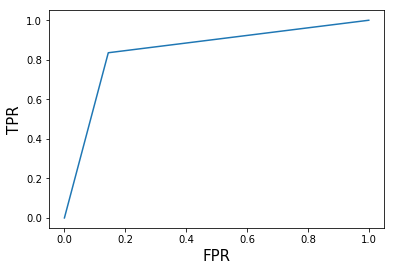

In [61]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import *
fpr, tpr, thresholds = metrics.roc_curve(ydt_test, results_dt,pos_label=1)
metrics.auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(ydt_test, results_dt,pos_label=1)
metrics.auc(fpr,tpr)
#x = np.array(fpr)
#y = np.array(tpr)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot(fpr,tpr)
